<center><H1><b>Fake News Prediction </b></H1></center>
<center><H2><b>Name: Vinit Awale</b></H2></center>
<center><H2><b>Roll No: 18D070067</b></H2></center>
<center><H2><b>DS 203 Course Project</b></H2></center>

# Imports

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium

from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

# Load the Data

In [71]:
train_data=pd.read_csv('Dataset/train.csv')
test_data=pd.read_csv('Dataset/test.csv')

In [72]:
train_data.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [73]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [74]:
## Size of the dataset
print('There are {} rows and {} columns in train'.format(train_data.shape[0],train_data.shape[1]))
print('There are {} rows and {} columns in train'.format(test_data.shape[0],test_data.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in train


# Target Value Distribution

Before we begin anything we first have a look at the distribution of the target variable. Since, the target variable can take only two values, we look at their distribution using a Pie Chart.

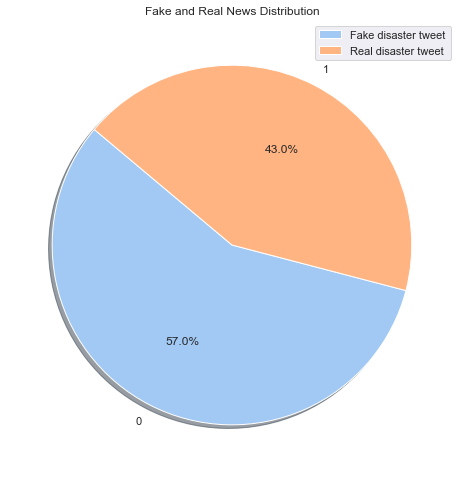

In [79]:
## Pie chart of the number of fake and real news using the target column
colors = sns.color_palette('pastel')[0:2]
sizes = train_data.target.value_counts()
sizes.plot.pie(autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)
plt.title('Fake and Real News Distribution')
plt.ylabel('')
plt.legend(["Fake disaster tweet", "Real disaster tweet "], loc="best")
plt.savefig('Results/Fake_News_Prediction_Pie_Chart.png', facecolor='w', edgecolor='w')
plt.show()


Hence we can observe that the dataset is skewed towards the Fake News. 57% of the data is Fake News.

# Exploring the location of the Tweets


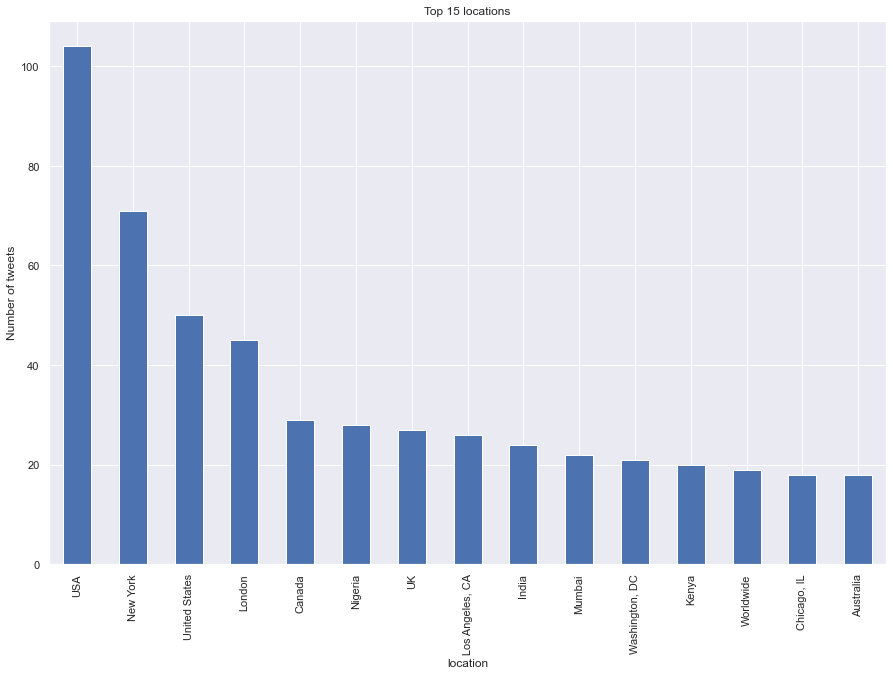

In [80]:
## Bar plot of number of tweets from a given location using seaborn
# Change the background color of the plot
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
train_data.groupby('location')['location'].count().sort_values(ascending=False).head(15).plot(kind='bar',figsize=(15,10)) 
plt.title('Top 15 locations')
plt.ylabel('Number of tweets')
plt.savefig('Results/Location_Bar_Plot.png', facecolor='w', edgecolor='w')
# plt.grid(False)
plt.show()



Hence we can observe that the location of the tweets are mostly in the United States.

# Visualizing the Locations of the Tweets on a Map

In [ ]:
df = train_data['location'].value_counts()[:20,]
df = pd.DataFrame(df)
df = df.reset_index()
df.columns = ['location', 'counts'] 
geolocator = Nominatim(user_agent="my-application")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
dictt_latitude = {}
dictt_longitude = {}
for i in df['location'].values:
    print(i)
    location = geocode(i)
    dictt_latitude[i] = location.latitude
    dictt_longitude[i] = location.longitude
df['latitude']= df['location'].map(dictt_latitude)
df['longitude'] = df['location'].map(dictt_longitude)

map1 = folium.Map(location=[10.0, 10.0], tiles='CartoDB dark_matter', zoom_start=2.3)
markers = []
for i, row in df.iterrows():
    loss = row['counts']
    if row['counts'] > 0:
        count = row['counts']*0.4
    folium.CircleMarker([float(row['latitude']), float(row['longitude'])], radius=float(count), color='#ef4f61', fill=True).add_to(map1)
map1

## Distribution of the Real and Fake Tweets based on the location

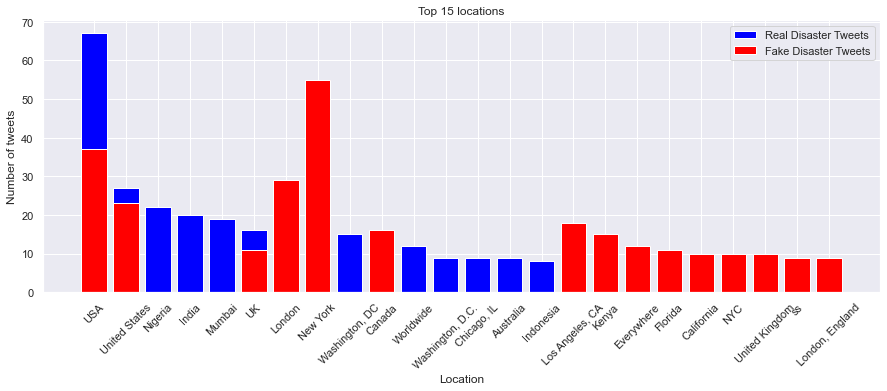

In [78]:
## Bar plot for real and fake news based on the location using Seaborn 
train_1 = train_data[train_data.target == 1]
train_0 = train_data[train_data.target == 0]

cnt_1 = train_1['location'].value_counts()
cnt_0 = train_0['location'].value_counts()

cnt_1 = cnt_1[:15]
cnt_0 = cnt_0[:15]

# Plotting the bar plot
plt.figure(figsize=(15,5))
plt.bar(cnt_1.index, cnt_1.values, color='blue', label='Real Disaster Tweets')
plt.bar(cnt_0.index, cnt_0.values, color='red', label='Fake Disaster Tweets')
plt.title('Top 15 locations')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.ylabel('Number of tweets')
plt.legend()
plt.savefig('Results/Location_Distribution_Bar_Plot.png')
plt.show()